In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as sm 
from sklearn import datasets 
from sklearn.metrics import confusion_matrix, classification_report


In [0]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 7,4

In [0]:
iris = datasets.load_iris()


In [10]:
datasets.load_iris(return_X_y= False)

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [12]:
X = scale(iris.data)
Y = pd.DataFrame(iris.target) # taregt variable Y , DataFrame constructor
variables_names = iris.feature_names
X[0:10,]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [38]:
clustering = KMeans(n_clusters=3, random_state = 5 )
clustering.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [0]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
Y.columms = ['Targets']

In [0]:
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

Text(0.5, 1.0, 'KMeans Classification')

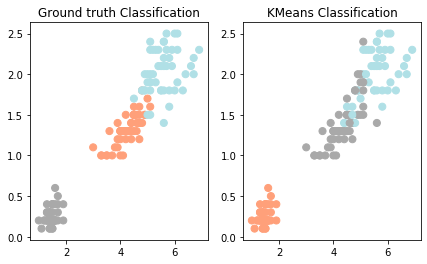

In [41]:
plt.subplot(1,2,1)
plt.scatter(x = iris_df.Petal_Length, y = iris_df.Petal_Width,  c = color_theme[iris.target], s = 50)
plt.title("Ground truth Classification")
plt.subplot(1,2,2)
plt.scatter(x = iris_df.Petal_Length, y = iris_df.Petal_Width,  c = color_theme[clustering.labels_], s = 50)
plt.title("KMeans Classification")



In [0]:
#resigning label names 
relabel = np.choose(clustering.labels_, [2,0,1]).astype(np.int64)

Text(0.5, 1.0, 'KMeans Classification')

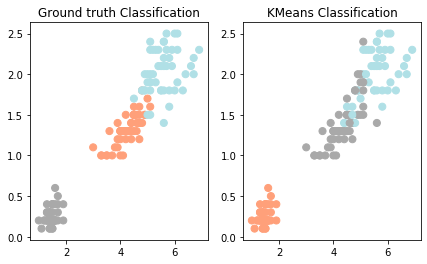

In [44]:
plt.subplot(1,2,1)
plt.scatter(x = iris_df.Petal_Length, y = iris_df.Petal_Width,  c = color_theme[iris.target], s = 50)
plt.title("Ground truth Classification")
plt.subplot(1,2,2)
plt.scatter(x = iris_df.Petal_Length, y = iris_df.Petal_Width,  c = color_theme[clustering.labels_], s = 50)
plt.title("KMeans Classification")

In [47]:
#evaluation
print(classification_report(Y,relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.23      0.22      0.23        50
           2       0.26      0.28      0.27        50

    accuracy                           0.50       150
   macro avg       0.50      0.50      0.50       150
weighted avg       0.50      0.50      0.50       150

